In [1]:
from __future__ import division
from read_binary import *

# Warm Up: Bit Shifting

What is that strange sign `<<`? That's the bit shif. Try to ask python to shift the bits of `1`, three positions left:
```
1<<3
```
Let's see in detail:
```
1    # one in binary
10   # we shif one position lef we get two
100  # with the second shift we obtain four
1000 # with the third shift we finally obtain eight
```

In [2]:
print(1<<3)
print(8>>3)

8
1


# Binary Representation

We start from a 4 bits representation a number. Consider 3 bits for the mantissa, and one bit for the exponent. The numbers we can represent are:
$$
(1 + \mathrm{normalised\ mantissa})\cdot 2^{\mathrm{exponent}}
$$
The $\mathrm{nomalised\ mantissa}$ is the:
$$
\mathrm{normalised\ mantissa} = \frac{\mathrm{mantissa}}{\mathrm{upper\ bound}}
$$
With three binary digits, the $\mathrm{upper bound}$ is $2^3 = 8$




| binary mantissa | decimal mantissa | binary exponent | decimal exponent | decimal number      |
|-----------------|------------------|-----------------|------------------|---------------------|
| `000`           | `0`              | `0`             | `0`              | `(1+0/8)*2^0 = 1`   | 
| `001`           | `1`              | `0`             | `0`              | `(1+1/8)*2^0 = 9/8` |
| `010`           | `2`              | `0`             | `0`              | `(1+2/8)*2^0 = 10/8`|
| `011`           | `3`              | `0`             | `0`              | `(1+3/8)*2^0 = 11/8`|
| `100`           | `4`              | `0`             | `0`              | `(1+4/8)*2^0 = 12/8`|
| `101`           | `5`              | `0`             | `0`              | `(1+5/8)*2^0 = 13/8`|
| `110`           | `6`              | `0`             | `0`              | `(1+6/8)*2^0 = 14/8`|
| `111`           | `7`              | `0`             | `0`              | `(1+7/8)*2^0 = 15/8`|
| `000`           | `0`              | `1`             | `1`              | `(1+0/8)*2^1 = 2`   | 
| `001`           | `1`              | `1`             | `1`              | `(1+1/8)*2^1 = 18/8`|
| `010`           | `2`              | `1`             | `1`              | `(1+2/8)*2^1 = 20/8`|
| `011`           | `3`              | `1`             | `1`              | `(1+3/8)*2^1 = 22/8`|
| `100`           | `4`              | `1`             | `1`              | `(1+4/8)*2^1 = 24/8 = 3`|
| `101`           | `5`              | `1`             | `1`              | `(1+5/8)*2^1 = 26/8`|
| `110`           | `6`              | `1`             | `1`              | `(1+6/8)*2^1 = 28/8`|
| `111`           | `7`              | `1`             | `1`              | `(1+7/8)*2^1 = 30/8`|

From this elementary example we learn:
 - The numbers representable with a *finite* precision are *finite*, in this case they are $16 = 2^4$.
 - There are a minimum and a maximum number that can be represented.
 - In between $2^n$ and $2^{n+1}$ there is a fixed number of numbers, in particular $2^3 = 8$.
 - The spacing in betweeen numbers gorws as numbers grow. We obseve that number multiplied by $2^0$ are $1/8$ spaced, numbers mutiplied by $2^1$ are $2/8$ spaced. The greater the exponent the less precise is the representation.

# Floating Point Representation

$$
(1-2\cdot\mathrm{sign})\cdot(1+\mathrm{normalised\ mantissa})\cdot 2^{\mathrm{exponent}-\mathrm{bias}}
$$

Check on the [IEEE link](http://www.h-schmidt.net/FloatConverter/IEEE754.html):
 - What is the binary representation for 1? 
   * You get $2^0$.
   * The value for the exponent is `01111111 = 10000000 - 00000001`.
   * Which in deciaml reads: $2^7-1 = 128 -1 = 127$
   * $127$ is the `bias` for the exponent representation: $2^{\mathrm{exponent}-\mathrm{bias}}$
 - Switch on the least meaningful bit for the exponent, you get $2^{-126}$. This tells you that the bias number, dividing positive and negative exponents, is $2^7-1 = 127$.
 - Switch on 2. What happens now if you switch on the least significative bit for the exponent?
 - What is the binary representation for .5?
 - What is the binary representation for 2?
 - What is the binary representation for 8?
 - What is the binary representation for 0.1? And for 0.100000001?
 - Control what happens with 3.
 

## Single Precision Representation

- 32 bits.
  * 1 bit for the sign.
  * 8 bits for the exponent.
  * 23 bits for the mantissa.

### From Float to Binary

In [3]:
f = .1

b32 = single_precision(f)

print('number of bits = '+str(len(b32)))

sbit, wbits, pbits = b32[:1], b32[1:9], b32[9:]

print('binary sign = '+sbit)
print('binary exponent = '+wbits)
print('binary mantissa = ' +pbits)

number of bits = 32
binary sign = 0
binary exponent = 01111011
binary mantissa = 10011001100110011001101


### From Binary to Float

In [4]:
print('exponent = '+str(int(wbits,2)))
print('number of possible exponents = ' + str(2**8))
print('bias = ' + str((1<<7)-1))
print('exponent - bias = '+str(int(wbits,2) - (1<<7) + 1))
print('mantissa = '+str(int(pbits,2)))
print('normalized mantissa = '+str(int(pbits,2) / (1<<23))) # normalisation
print "result = ",(1-2*int(sbit,2))*(1+int(pbits,2) / (1<<23))*2**(int(wbits,2) - (1<<7) + 1)

exponent = 123
number of possible exponents = 256
bias = 127
exponent - bias = -4
mantissa = 5033165
normalized mantissa = 0.600000023842
result =  0.10000000149


## Double Precision 

 - 64 bits.
   * 1 bit for the sign.
   * 11 bits for the exponent.
   * 52 bits for the mantissa. 

In [5]:
f = 1.

b64 = double_precision(f)

print('number of bits = '+str(len(b64)))

sbit, wbits, pbits = b64[:1], b64[1:12], b64[12:]

print('binary sign = '+sbit)
print('binary exponent = '+wbits)
print('binary mantissa = ' +pbits)

number of bits = 64
binary sign = 0
binary exponent = 01111111111
binary mantissa = 0000000000000000000000000000000000000000000000000000


In [6]:
print('exponent = '+str(int(wbits,2)))
print('number of possible exponents = ' + str(2**11))
print('bias = ' + str((1<<10)-1))
print('exponent - bias = '+str(int(wbits,2) - (1<<10) + 1))
print('mantissa = '+str(int(pbits,2)))
print('normalized mantissa = '+str(int(pbits,2) / (1<<52))) # normalisation
print "result = ",(1-2*int(sbit,2))*(1+int(pbits,2) / (1<<52))*2**(int(wbits,2) - (1<<10) + 1)

exponent = 1023
number of possible exponents = 2048
bias = 1023
exponent - bias = 0
mantissa = 0
normalized mantissa = 0.0
result =  1.0


## Secial Case

In [7]:
import numpy as np
#
# I should comment on smallest integer 
# representable integer
#
print('%1.9f' % np.float32(0.1))
print('%1.17f' % np.float64(0.1))
#
a = .1
for i in range(100):
    a+=.1
print(a)
#print('%1.17f' % np.sum(.1*np.ones((1e8))))

0.100000001
0.10000000000000001
10.1


## Epsilon Machine

For any format, the machine epsilon is the difference between 1 and the next larger number that can be stored in that format.

To understaind that is sufficent to go back to the IEEE web site, get the represesentation for one, and switch on the least significative bit for the mantissa, the result we get is $2^{-23}\approx 10^{-7}$


# Assignement

## Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [8]:
def FD(f, x, h):
    return (f(x+h)-f(x))/h

Graphical interpretation of finite difference:

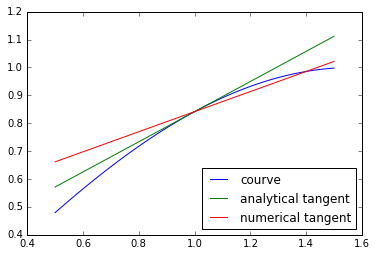

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(.5,1.5)
y = np.sin(x)

analytical_slope = np.cos(1)

numerical_slope = FD(np.sin, 1, .4)

plt.plot(x,y)
plt.plot(x,analytical_slope*(x-1)+np.sin(1))
plt.plot(x,numerical_slope*(x-1)+np.sin(1))
plt.legend(['courve','analytical tangent','numerical tangent'],loc=4)

plt.show()

## Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

## Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

In [10]:
hs1 = [10.0**(-i) for i in np.arange(0,21)]
fd1 = [FD(np.sin, 1.0, h) for h in hs1]

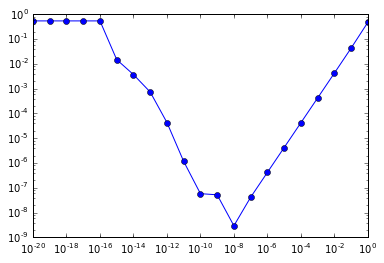

In [11]:
error1 = [np.absolute(fd-np.cos(1.0)) for fd in fd1]
plt.loglog(hs1, error1, '-o')
plt.show()

## Error plots base 2
Repeate steps above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

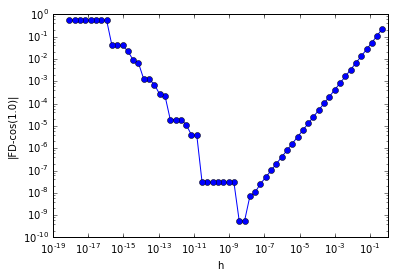

In [12]:
fd1 = [FD(np.sin,1.,2.**(-i)) for i in range(1,61,1)]
x = [2.**(-i) for i in range(1,61,1)]

plt.loglog(x,np.absolute(fd1-np.cos(1.0)),"-o",label='base 2')
plt.xlabel('h')
plt.ylabel('|FD-cos(1.0)|')

## Exaplanation

When $h$ gets smaller than $10^{-8}$ the difference between the function and its linear approximation is in the order of $\left(10^{-8}\right)^{2} = 10^{-16}$. Below this threshold the machine canno crunch numbers in an accurate way an the error blows up.

![alt text](linear_appx.png)